# **Imports**
We're using TensorFlow for developing, training and deploying the model, NumPY for flattening the matrices, performing operations and speeding up traversal, and Matplotlib for plotting our findings, depicting what we have done.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Initialization**
Here, we set up the parameters for the subsequent functions, define variables that we will be using in the future.

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 42
NO_EPOCHS = 50
BATCH_SIZE = 32

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#**Dataset Information**
This is Zalando's Fashion MNIST dataset, which is a set of 70,000 28 x 28 pixel greyscale images, out of which 60,000 is used for training and 10,000 for testing purposes.

#Shape of Data

In [5]:
print("Shape of Training Image Data: " + str(train_images.shape))
print("Shape of Training Class Data: " + str(train_labels.shape))
print("Shape of Test Image Data: " + str(test_images.shape))
print("Shape of Test Class Data: " + str(test_labels.shape))

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


# First 10 Images

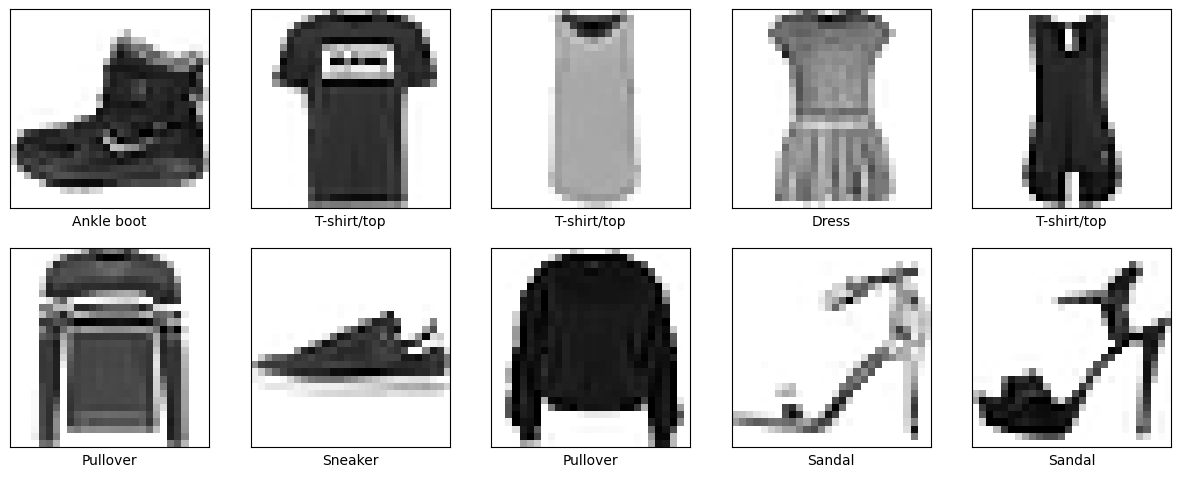

In [6]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Magnified View with Pixel Values

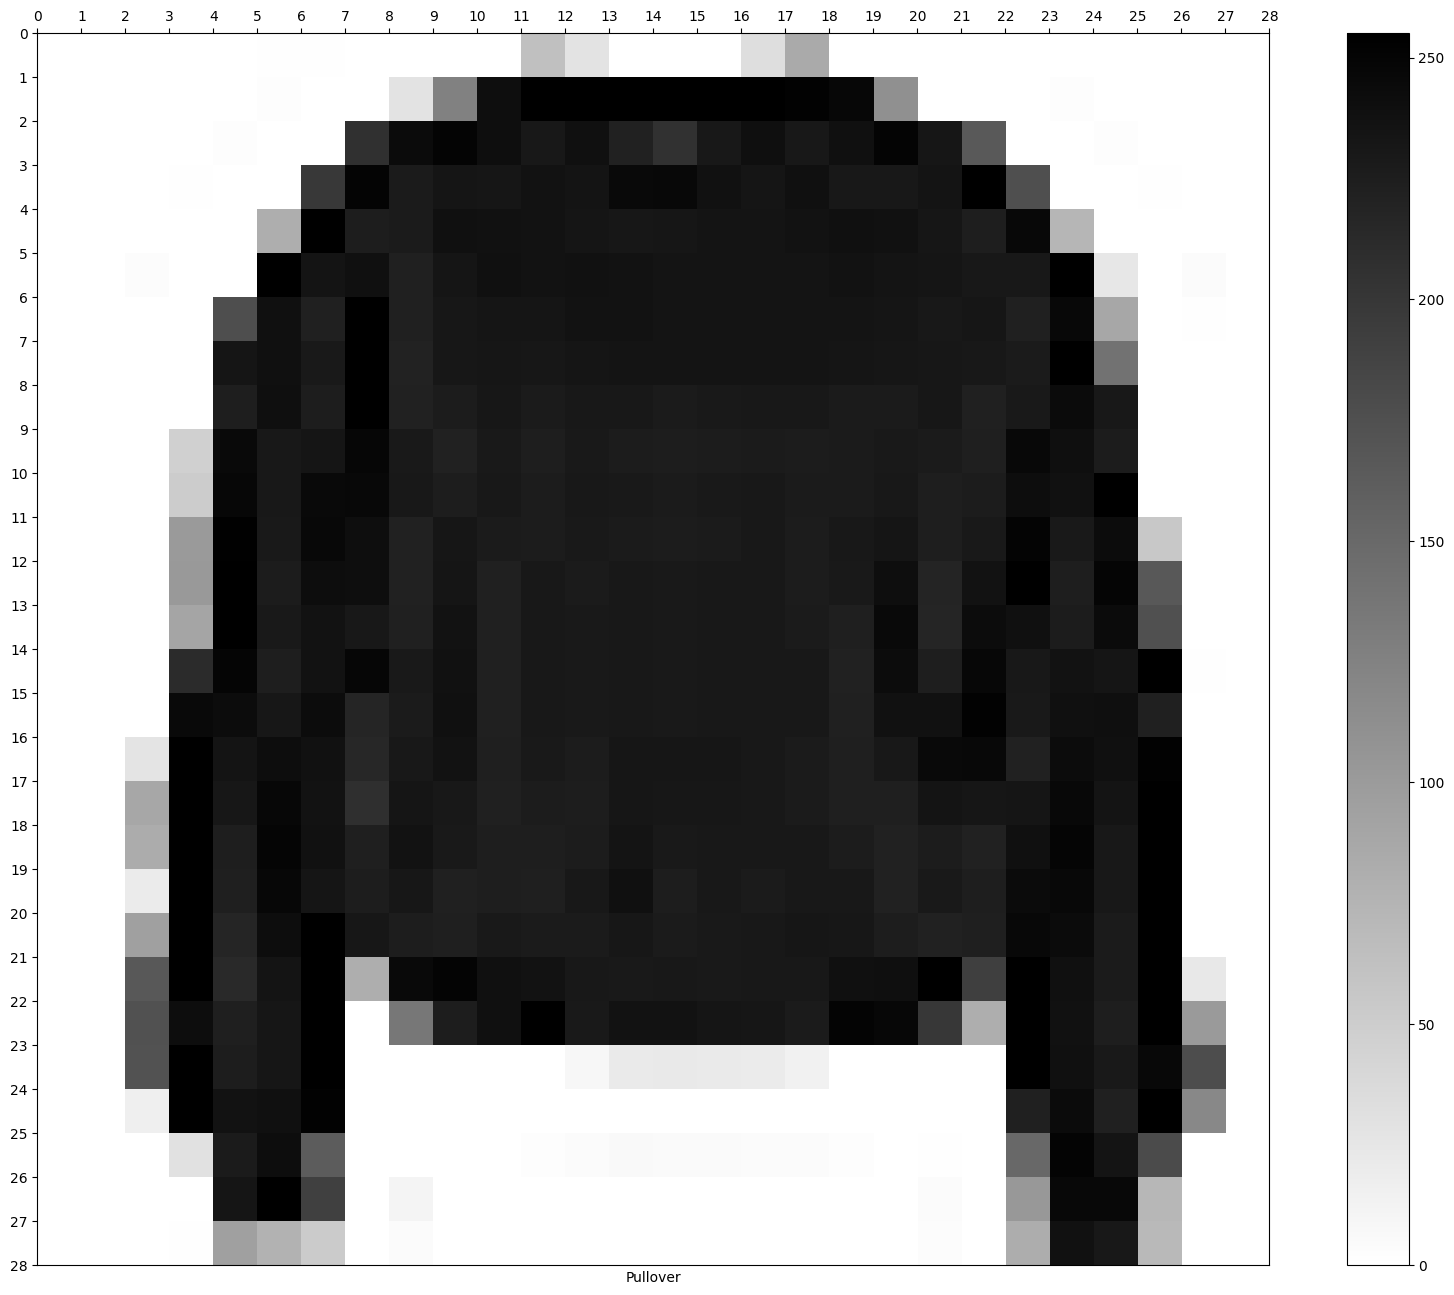

In [7]:
index = 7
plt.figure(figsize=(20,16))
plt.imshow(train_images[index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[index]])
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.xaxis.tick_top()
plt.show()

#**Building a Convolutional Neural Network**
In this stage, we will build a neural network, which will have multiple layers, filtering the features at each level and learning from it. We'll start by preprocessing the data, creating a datagen to allow new images to be classified, add dropout, convolution, pooling layers following which we will fit the model, reduce the linear regression and re-fit the model, to achieve an accuracy close to 95%.

# Data Preprocessing

In [8]:
def data_preprocessing(images, labels):
    out_y = tf.keras.utils.to_categorical(labels, NUM_CLASSES)
    num_images = images.shape[0]
    x_as_array = images.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_as_array / 255
    return out_x, out_y

In [9]:
X, y = data_preprocessing(train_images, train_labels)
X_test, y_test = data_preprocessing(test_images, test_labels)
print(X_test.shape, y_test.shape)

(10000, 28, 28, 1) (10000, 10)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zca_whitening=True)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [12]:
datagen.fit(X_train)

# CNN

In [13]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(256,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adam",
              metrics=['accuracy'])

First Run

In [14]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/training.py:1961: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1500/1500 [==============================] - 69s 39ms/step - loss: 1.0401 - accuracy: 0.6227
Epoch 2/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.6564 - accuracy: 0.7565
Epoch 3/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.5885 - accuracy: 0.7853
Epoch 4/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.5353 - accuracy: 0.8033
Epoch 5/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4999 - accuracy: 0.8171
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.4787 - accuracy: 0.8248
Epoch 7/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.4548 - accuracy: 0.8342
Epoch 8/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.4422 - accuracy: 0.8391
Epoch 9/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.4275 - accuracy: 0.8438
Epoch 10/10
1500/1500 [==============================] - 60s 40m

Split

In [15]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


Importing New Modules to improve the output

In [16]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

#Fitting

In [33]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val),callbacks=[reduce_lr])

Epoch 1/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2801 - accuracy: 0.8986 - val_loss: 0.2503 - val_accuracy: 0.9093
Epoch 2/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2350 - accuracy: 0.9154 - val_loss: 0.2050 - val_accuracy: 0.9271
Epoch 3/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2126 - accuracy: 0.9236 - val_loss: 0.2075 - val_accuracy: 0.9249
Epoch 4/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1928 - accuracy: 0.9308 - val_loss: 0.2022 - val_accuracy: 0.9271
Epoch 5/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1799 - accuracy: 0.9365 - val_loss: 0.1898 - val_accuracy: 0.9328
Epoch 6/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1672 - accuracy: 0.9405 - val_loss: 0.1900 - val_accuracy: 0.9336
Epoch 7/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1551 - accuracy: 0.9450 - val_loss: 0.1950 -

#**Evaluating Performance**

**Classification Report**

In [41]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.91      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.94      0.91      0.92      1000
       Dress       0.93      0.96      0.95      1000
        Coat       0.90      0.92      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.84      0.82      0.83      1000
     Sneaker       0.97      0.98      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#Training Accuracy and Validation Accuracy

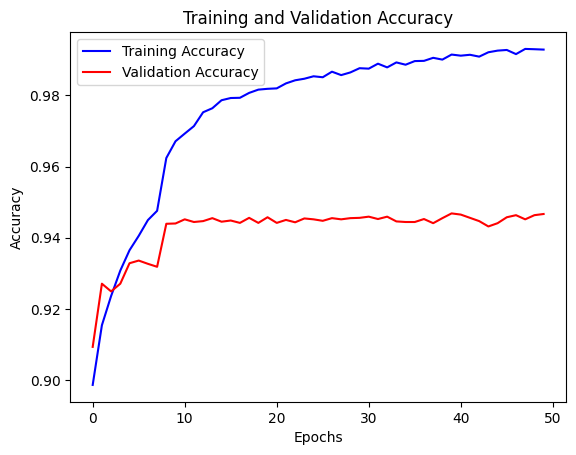

In [40]:
train_acc = train_model.history['accuracy']
val_acc = train_model.history['val_accuracy']
plt.plot(train_acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Testing Accuracy

Test Accuracy: 0.9437


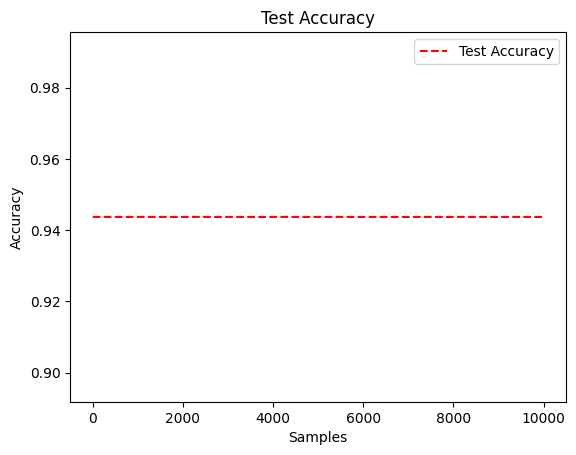

In [38]:
accuracy = np.sum(predicted_labels == actual_labels) / len(actual_labels)
print("Test Accuracy:", accuracy)

plt.figure()
plt.plot(np.arange(len(actual_labels)), accuracy * np.ones(len(actual_labels)), 'r--', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Incorrect Samples

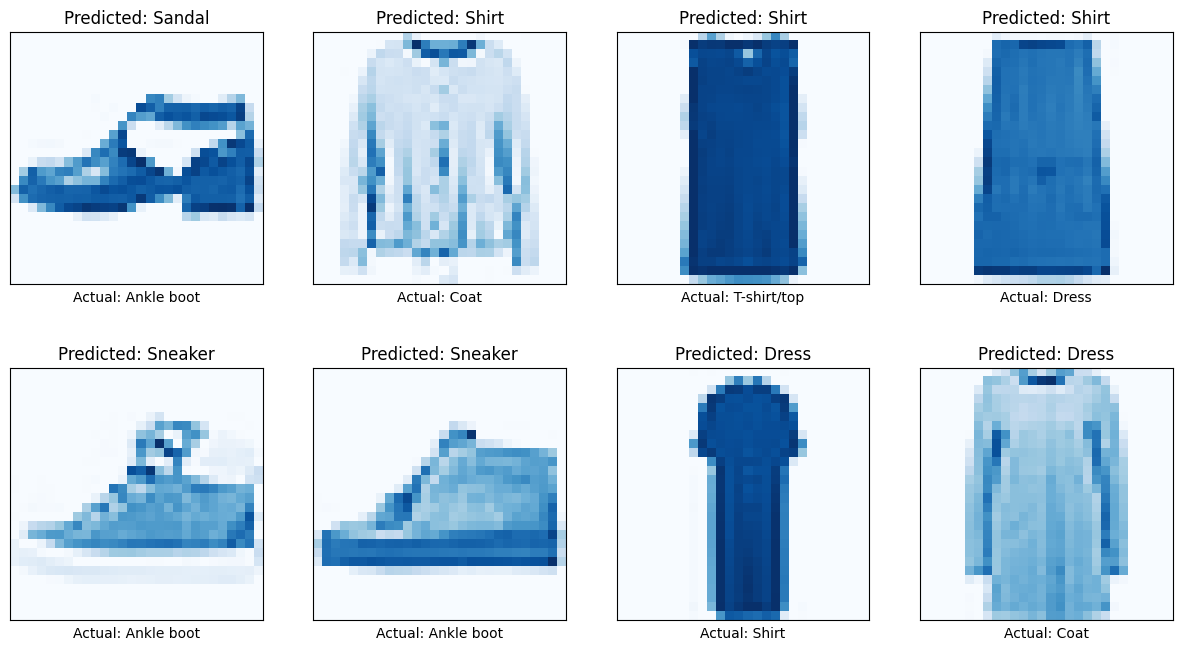

In [46]:
incorrect_indices = np.nonzero(predicted_labels != actual_labels)[0]

plt.figure(figsize=(15, 8))
for j, index in enumerate(incorrect_indices[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[index].reshape(28, 28), cmap="Blues")
    plt.title("Predicted: {}".format(class_names[predicted_labels[index]]))
    plt.xlabel("Actual: {}".format(class_names[actual_labels[index]]))
plt.show()


#Saving the Model

In [57]:
from tensorflow.keras.models import load_model
try:
    model.save('Fashion_MNIST_CNN_Model.h5')
except:
    print('Model Downloaded')

Model Downloaded
